### Problem Statements:

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Importing the libraries & Reading the data file

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import nltk

stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulprajapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulprajapati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rahulprajapati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rahulprajapati/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulprajapati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
raw_data = pd.read_csv('flipitnews-data.csv')
raw_data.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


### Exploring the dataset 

In [3]:
raw_data.Category.value_counts()

Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64

In [4]:
raw_data.shape

(2225, 2)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
raw_data.describe(include='all').T

,count,unique,top,freq
Category,2225,5,Sports,511
Article,2225,2126,kennedy questions trust of blair lib dem leade...,2


In [7]:
### checking nan values:
raw_data.isna().sum()

Category    0
Article     0
dtype: int64

In [8]:
### checking the duplicates:
raw_data.duplicated().sum()

np.int64(99)

- In this data having the 99 recorde having the duplicates:

### Visualize the category columns:

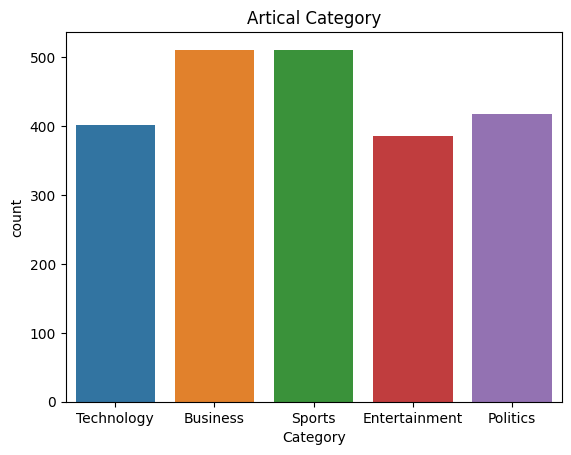

In [9]:
sns.countplot(x = 'Category', 
             data=raw_data,
             hue  = 'Category')
plt.title('Artical Category')
plt.show()

- Data looks like balanced of every category:

### Visualize the Artical data:

- Technology Artical

In [10]:
raw_data.drop_duplicates(inplace=True)

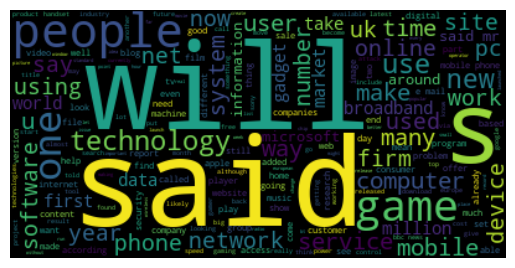

In [11]:
text = raw_data[raw_data.Category=='Technology'].Article.tolist() 

text = ' '.join(text).lower()



wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- Business

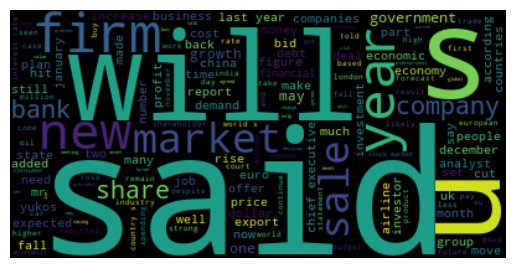

In [12]:
text = raw_data[raw_data.Category=='Business'].Article.tolist() 

text = ' '.join(text).lower()



wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- Sports

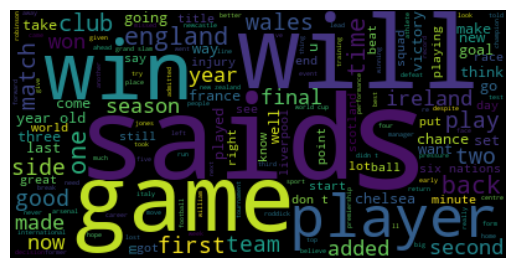

In [13]:
text = raw_data[raw_data.Category=='Sports'].Article.tolist() 

text = ' '.join(text).lower()



wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- Politics

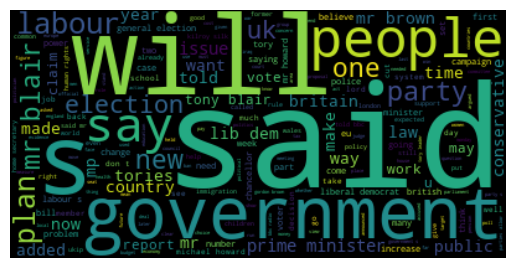

In [14]:
text = raw_data[raw_data.Category=='Politics'].Article.tolist() 

text = ' '.join(text).lower()



wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- Entertainment

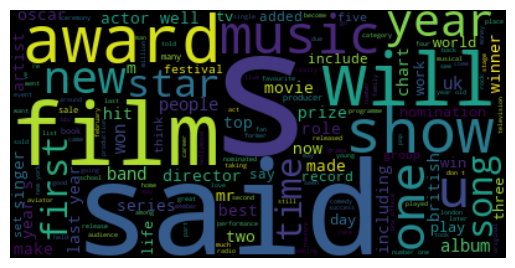

In [15]:
text = raw_data[raw_data.Category=='Entertainment'].Article.tolist() 

text = ' '.join(text).lower()



wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### Preprocessing pipeline:

In [35]:
import re

def lower_text(text):
    try:
        return text.lower()
    except Exception as ex:
        print(f'error is coming from given lower text :: {ex}')



def remove_digits(text):
    try:
        
        return re.sub(r'\d+', '', text)
        
    except Exception as ex:
        print(f'error is coming from given remove extra space :: {ex}')



def remove_punctuations(text):
    try:
        words = nltk.word_tokenize(text)
        
        return ' '.join([word for word in words if word.isalpha()])
    except Exception as ex:
        print(f'error is coming from give  remove punctuations :: {ex}')

def remove_single_char_words(text):
    try:
        return re.sub(r'\b\w\b', '', text)
    except Exceptions as ex:
        print(f'error is coming from given remove single char words :: {ex}')
        

def remove_non_words(text):
    try:
        
        return re.sub(r'\w\s', '', text)
        
    except Exception as ex:
        print(f'error is coming from given remove non words :: {ex}')
        



def remove_extra_space(text):
    try:
        
        return text.strip()
        
    except Exception as ex:
        print(f'error is coming from given remove extra space :: {ex}')



def text2words(text):
    try:
        return word_tokenize(text)
    except Exception as ex:
        print(f'error is coming from given text2words :: {ex}')

def remove_stopwords(text):
    try:
        words = text2words(text)
        return ' '.join([word for word in words if word not in stop_words])
    
    except Exception as ex:
        print(f'error is coming from given remove extra space :: {ex}')


def stemming_text(text):
    try:
        return ' '.join([stemmer.stem(word) for word in text])
        
    except Exception as ex:
        print(f'error is coming from given lemmatizations :: {ex}')

def lemmatization_text(text):
    try:
        words = text2words(text)
        return ' '.join([lemmer.lemmatize(word) for word in words])
        
    except Exception as ex:
        print(f'error is coming from given lemmatizations :: {ex}')



In [36]:

def preprocessing_pipeline(x):
    try:
        x = lower_text(x)
        x = remove_digits(x)
        x = remove_punctuations(x)
        x = remove_single_char_words(x)
        x = remove_extra_space(x)
        x = remove_stopwords(x)
        x = lemmatization_text(x)
        return x
    except Exception as ex:
        print(f'error is coming from given preprocessing pipleine :: {exx}')

In [37]:
raw_data['preprocessed_txt'] = raw_data.Article.apply(lambda x : preprocessing_pipeline(x))

In [38]:
raw_data.preprocessed_txt[3]

'yeading face newcastle fa cup premiership side newcastle united face trip ryman premier league leader yeading fa cup third round game arguably highlight draw potential yeading beat slough second round conference side exeter city knocked doncaster saturday travel old trafford meet holder manchester united january arsenal drawn home stoke chelsea play host scunthorpe side draw hinckley united held brentford goalless draw sunday meet league one leader luton win replay martin allen team griffin park number premiership team face difficult away game championship side weekend january everton visit plymouth liverpool travel burnley crystal palace go sunderland fulham face carling cup watford bolton meet ipswich aston villa drawn sheffield united premiership struggler norwich blackburn west brom away west ham cardiff preston north end respectively southampton visit northampton already beaten league two side carling cup earlier season middlesbrough drawn away either swindon notts county spur en

In [39]:
raw_data.head()

,Category,Article,preprocessed_txt
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


### Encoding and Transforming the data 

In [42]:
X = raw_data.preprocessed_txt
y = raw_data.Category

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1594,), (1594,), (532,), (532,))

### . Model Training & Evaluation:

In [54]:

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])


In [55]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [74]:
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by Christmas."
print('\n')
print(nb.predict([complaint]))

complaint = "tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow people to record store play pause and forward wind tv programmes when they want. essentially the technology allows for much more personalised tv. they are also being built-in to high-definition tv sets which are big business in japan and the us but slower to take off in europe because of the lack of high-definition programming. not only can people forward wind through adverts they can also forget about abiding by network and channel schedules putting together their own a-la-carte entertainment. but some us networks and cable and satellite companies are worried about what it means for them in terms of advertising revenues as well as brand identity and viewer loyalty to channels. although the us leads in this technology at the moment it is also a concern that is being raised in europe particularly with the growing uptake of services like sky+. what happens here today we will see in nine months to a years time in the uk adam hume the bbc broadcast s futurologist told the bbc news website. for the likes of the bbc there are no issues of lost advertising revenue yet. it is a more pressing issue at the moment for commercial uk broadcasters but brand loyalty is important for everyone. we will be talking more about content brands rather than network brands said tim hanlon from brand communications firm starcom mediavest. the reality is that with broadband connections anybody can be the producer of content. he added: the challenge now is that it is hard to promote a programme with so much choice. what this means said stacey jolna senior vice president of tv guide tv group is that the way people find the content they want to watch has to be simplified for tv viewers. it means that networks in us terms or channels could take a leaf out of google s book and be the search engine of the future instead of the scheduler to help people find what they want to watch. this kind of channel model might work for the younger ipod generation which is used to taking control of their gadgets and what they play on them. but it might not suit everyone the panel recognised. older generations are more comfortable with familiar schedules and channel brands because they know what they are getting. they perhaps do not want so much of the choice put into their hands mr hanlon suggested. on the other end you have the kids just out of diapers who are pushing buttons already - everything is possible and available to them said mr hanlon. ultimately the consumer will tell the market they want. of the 50 000 new gadgets and technologies being showcased at ces many of them are about enhancing the tv-watching experience. high-definition tv sets are everywhere and many new models of lcd (liquid crystal display) tvs have been launched with dvr capability built into them instead of being external boxes. one such example launched at the show is humax s 26-inch lcd tv with an 80-hour tivo dvr and dvd recorder. one of the us s biggest satellite tv companies directtv has even launched its own branded dvr at the show with 100-hours of recording capability instant replay and a search function. the set can pause and rewind tv for up to 90 hours. and microsoft chief bill gates announced in his pre-show keynote speech a partnership with tivo called tivotogo which means people can play recorded programmes on windows pcs and mobile devices. all these reflect the increasing trend of freeing up multimedia so that people can watch what they want when they want."

print('\n')
print(nb.predict([complaint]))

print(classification_report(y_test, y_pred))

     

accuracy 0.9680451127819549


['Business']


['Technology']
               precision    recall  f1-score   support

     Business       0.94      0.99      0.96       122
Entertainment       0.98      0.98      0.98        84
     Politics       0.95      0.95      0.95       104
       Sports       0.98      1.00      0.99       125
   Technology       1.00      0.91      0.95        97

     accuracy                           0.97       532
    macro avg       0.97      0.97      0.97       532
 weighted avg       0.97      0.97      0.97       532



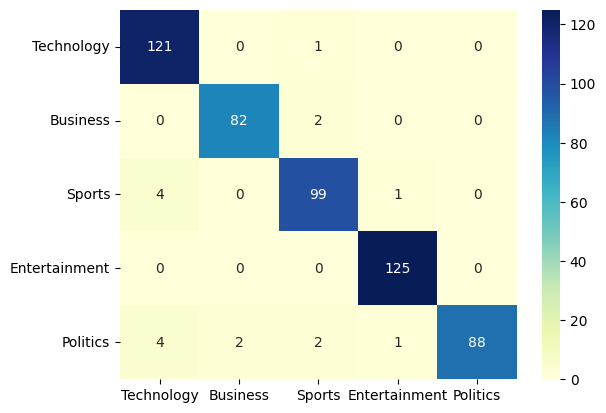

In [77]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, 
          xticklabels=raw_data['Category'].unique(), 
          yticklabels=raw_data['Category'].unique(), 
          cmap="YlGnBu", fmt='g')
plt.show()

### Questionnaire - Answers:

How many news articles are present in the dataset that we have?
 - 2225

Most of the news articles are from _____ category.
 - Sports

Identify the category with the highest number of articles.
- Only Sports 


- Stop words are common words like "and", "the", "is", etc., which usually do not contain significant meaning and are often removed from text data to reduce noise and improve processing efficiency.
Explain the difference between Stemming and Lemmatization.

- Stemming reduces words to their base or root form by chopping off the end of the word (e.g., "running" to "run").
Lemmatization also reduces words to their base or root form but does so using a dictionary to ensure the root word is a valid word (e.g., "better" to "good").
Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

- Bag of Words (BoW) is a simpler technique where each word is counted in the document.
TF-IDF (Term Frequency-Inverse Document Frequency) is more sophisticated, adjusting the count based on the importance of a word in relation to the entire corpus.
Efficiency depends on the context: BoW is computationally cheaper but TF-IDF often gives better performance by reducing the weight of common words.
What’s the shape of train & test data sets after performing a 75:25 split.